In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [6]:
# Step 1: Load hotel review data
df = pd.read_csv('./data/Hotel_Reviews.csv')

In [7]:
# Step 2: Define sentiment function using TextBlob
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [8]:
# Step 3: Apply sentiment analysis to Positive and Negative reviews
df['Negative_Sentiment'] = df['Negative_Review'].apply(get_sentiment)
df['Positive_Sentiment'] = df['Positive_Review'].apply(get_sentiment)

In [9]:
# Step 4: Compute overall sentiment score
df['Sentiment_Score'] = df['Positive_Sentiment'] - df['Negative_Sentiment']

In [10]:
# Step 5: Compute average sentiment per hotel
hotel_sentiment = df.groupby('Hotel_Name')['Sentiment_Score'].mean().reset_index()

In [11]:
# Step 6: Get top 10 most positive and most negative hotels
top_positive = hotel_sentiment.sort_values(by='Sentiment_Score', ascending=False).head(10)
top_negative = hotel_sentiment.sort_values(by='Sentiment_Score', ascending=True).head(10)

In [12]:
# Step 7: Plot bar charts
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

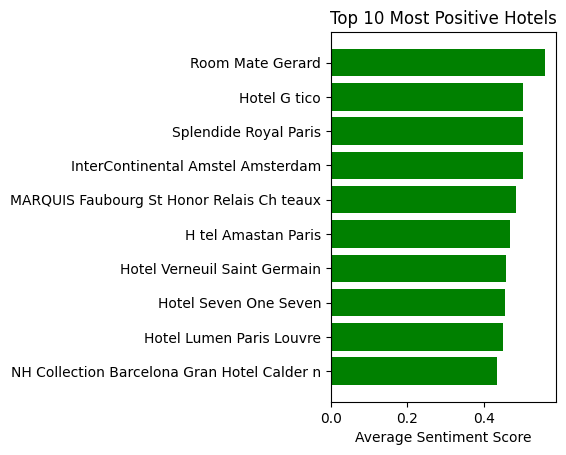

In [13]:
# Positive hotels
plt.subplot(1, 2, 1)
plt.barh(top_positive['Hotel_Name'], top_positive['Sentiment_Score'], color='green')
plt.title('Top 10 Most Positive Hotels')
plt.xlabel('Average Sentiment Score')
plt.gca().invert_yaxis()

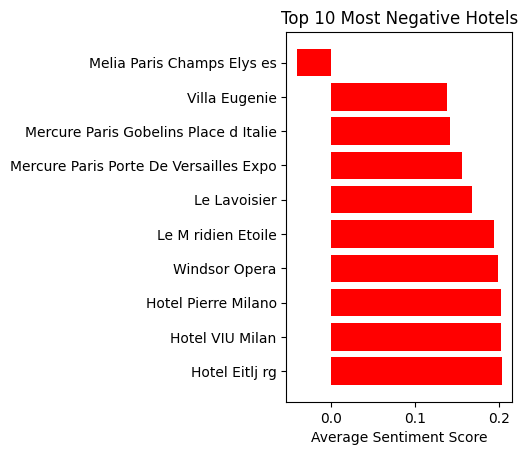

In [14]:
# Negative hotels
plt.subplot(1, 2, 2)
plt.barh(top_negative['Hotel_Name'], top_negative['Sentiment_Score'], color='red')
plt.title('Top 10 Most Negative Hotels')
plt.xlabel('Average Sentiment Score')
plt.gca().invert_yaxis()

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>